In [14]:
import pandas as pd
import ensembl_rest
import numpy as np

fname = "mrnanorm.txt"
mapper = {'Akt': "AKT1",
    'ALDH1A1 (PMID 11751205)': "ALDH1A1", 
    'Aqp5(Aquaporin)': "AQP5",
    'C/EBP': "CEBPB",
    'Chi3l3/Chi3l4': "CHI3L1",
    'Claudin 1': "CLDN1",
    'Claudin 3': "CLDN3",
    'Claudin 7': "CLDN7", 
    'Claudin5': "CLDN5",
    #"Serpina3": "a1ACT",
    'E-Cadherin (CDH1)': "CDH1",
    'FSP1 (S100a4)': "AIFM2",
    'GUCY1A2  sGC(soluble guanylate cyclase) (PMID 23934926)': "GUCY1A2",
    'EGFR (Epidermal growth factor receptor) (PMID 22916088 22245996)': "EGFR",
    'ITGax (CD11c)': "ITGAX",
    'integrin subunit alpha 8': "ITGA8",
    'LFNG (Lunatic Fringe) (PMID 19897741)': "LFNG",
    'PDGFRA (platelet-derived growth factor receptor alpha) (PMID 23748534) (Most important)': "PDGFRA",
    'PDPn(Podoplanin)': "PDPn",
    'RARA RARBRARG  Retinoic acid receptors alpha beta gamma': "RARA",
    'Vegf': "VEGFA",
    'ITgam (CD11b)': "ITGAM",
    'kcne1L': "KCNE5",
    'KLra4': "KLRC4",
    'ERB': "ErbB2",
    'hprt': "HPRT1",
    'RAGE': "AGER",  
    'GATA-6': "GATA6",
    'HIF1alpha': "HIF1A",
    'Hist1h2ab': "H2AC4",
    'SFTP-C': "SFTPC",
    'SFTP-D': "SFTPD",
    'TTF-1': "TTF1",
    'MMP-3': "MMP3",
    'MUC5Ab': "MUC5B",
    'N-Cadherin(CDH2)': "CDH2",
    'P-63': "TRP63",
    "Serpina3": "Serpina3n",
    'BCL2A1': "BCL2",
    'KLRC4': " HGNC",
    'Hist1h1b': "H1f5",
}  

indices = {}
count = 0
info = {}
with open(fname,"r") as infile:
    for line in infile:
        splitted = line.rstrip().split("\t")
        if count == 0:
            for ind in range(1,len(splitted)):
                num = float(splitted[ind])
                if num < 0:
                    continue
                if num not in indices:
                    indices[num] = []
                indices[num].append(ind)
            count += 1
            continue
        splitted = line.rstrip().split("\t")
        values = [float(item) for item in splitted[1:]]
        data = {}
        for key,here in indices.items():
            data[key] = np.mean([values[index-1] for index in here])
        gene = splitted[0]
        info[gene] = data

#symbols = ['KLRC4']
symbols = info.keys()
missing = []
for symbol in symbols:
    try:
        if symbol in mapper:
            symbol = mapper[symbol]
        result = ensembl_rest.symbol_lookup(
            species='mus musculus',
            symbol=symbol
        )
        print(f"Symbol: {symbol}, Gene ID: {result['id']}, Chromosome: {result['seq_region_name']}, Start: {result['start']}, End: {result['end']}")
    except ensembl_rest.HTTPError as err:
        error_code = err.response.status_code
        error_message = err.response.json()['error']
        if error_code == 400:
            if 'No valid lookup found for symbol' in error_message:
                print(f"No valid lookup found for symbol: {symbol}")
                missing.append(symbol)
            else:
                print(f"HTTP Error {error_code}: {error_message}")
        else:
            raise

print(missing)
print(len(missing))

Symbol: ABCA3, Gene ID: ENSMUSG00000024130, Chromosome: 17, Start: 24570924, End: 24629175
Symbol: ABCD1, Gene ID: ENSMUSG00000031378, Chromosome: X, Start: 72760203, End: 72782140
Symbol: ABCG2, Gene ID: ENSMUSG00000029802, Chromosome: 6, Start: 58561508, End: 58672661
Symbol: Acta2, Gene ID: ENSMUSG00000035783, Chromosome: 19, Start: 34218490, End: 34232990
Symbol: actb, Gene ID: ENSMUSG00000029580, Chromosome: 5, Start: 142888870, End: 142892509
Symbol: ADAMTSL2, Gene ID: ENSMUSG00000036040, Chromosome: 2, Start: 26969391, End: 26998993
Symbol: AGER, Gene ID: ENSMUSG00000015452, Chromosome: 17, Start: 34816836, End: 34819910
Symbol: AKT1, Gene ID: ENSMUSG00000001729, Chromosome: 12, Start: 112620255, End: 112641318
Symbol: ALDH1A1, Gene ID: ENSMUSG00000053279, Chromosome: 19, Start: 20470079, End: 20620829
Symbol: ALDH1A2, Gene ID: ENSMUSG00000013584, Chromosome: 9, Start: 71123071, End: 71203525
Symbol: AMACR, Gene ID: ENSMUSG00000022244, Chromosome: 15, Start: 10981842, End: 10996

In [2]:
import pandas as pd
import ensembl_rest
import numpy as np

fname = "mrnanorm.txt"

mapper = {
    'Akt': "AKT1",
    'ALDH1A1 (PMID 11751205)': "ALDH1A1", 
    'Aqp5(Aquaporin)': "AQP5",
    'C/EBP': "CEBPB",
    'Chi3l3/Chi3l4': "CHI3L1",
    'Claudin 1': "CLDN1",
    'Claudin 3': "CLDN3",
    'Claudin 7': "CLDN7", 
    'Claudin5': "CLDN5",
    'E-Cadherin (CDH1)': "CDH1",
    'FSP1 (S100a4)': "AIFM2",
    'GUCY1A2  sGC(soluble guanylate cyclase) (PMID 23934926)': "GUCY1A2",
    'EGFR (Epidermal growth factor receptor) (PMID 22916088 22245996)': "EGFR",
    'ITGax (CD11c)': "ITGAX",
    'integrin subunit alpha 8': "ITGA8",
    'LFNG (Lunatic Fringe) (PMID 19897741)': "LFNG",
    'PDGFRA (platelet-derived growth factor receptor alpha)': "PDGFRA",
    'PDPn(Podoplanin)': "PDPn",
    'RARA RARBRARG  Retinoic acid receptors alpha beta gamma': "RARA",
    'Vegf': "VEGFA",
    'ITgam (CD11b)': "ITGAM",
    'kcne1L': "KCNE5",
    'KLra4': "KLRC4",
    'ERB': "ErbB2",
    'hprt': "HPRT1",
    'RAGE': "AGER",  
    'GATA-6': "GATA6",
    'HIF1alpha': "HIF1A",
    'Hist1h2ab': "H2AC4",
    'SFTP-C': "SFTPC",
    'SFTP-D': "SFTPD",
    'TTF-1': "TTF1",
    'MMP-3': "MMP3",
    'MUC5Ab': "MUC5B",
    'N-Cadherin(CDH2)': "CDH2",
    'P-63': "TRP63",
    "Serpina3": "Serpina3n",
    'BCL2A1': "BCL2",
    'KLRC4': " HGNC",
    'Hist1h1b': "H1f5",
}

indices = {}
count = 0
info = {}
with open(fname, "r") as infile:
    for line in infile:
        splitted = line.rstrip().split("\t")
        if count == 0:  
            for ind in range(1, len(splitted)):
                num = float(splitted[ind])
                if num not in indices:
                    indices[num] = []
                indices[num].append(ind)
            count += 1
            continue
    
        values = [float(item) for item in splitted[1:]]
        data = {}
        for key, here in indices.items():
            data[key] = np.mean([values[index-1] for index in here])
        gene = splitted[0]
        info[gene] = data

gene_info = []
missing_genes = []
for gene, expression in info.items():
    original_gene = gene
    if gene in mapper:
        gene = mapper[gene]
    try:
        result = ensembl_rest.symbol_lookup(species='mus musculus', symbol=gene)
        chromosome = result['seq_region_name']
        start = result['start']
        end = result['end']
    except ensembl_rest.HTTPError as err:
        chromosome, start, end = 'NA', 'NA', 'NA'
        missing_genes.append(original_gene)
    
    gene_info.append({'Gene': original_gene, 'Chromosome': chromosome, 'Start': start, 'End': end, **expression})

final_df = pd.DataFrame(gene_info)


final_df.to_csv("processed_mRNA_with_chromosomes.csv", index=False)

pd.DataFrame({'Missing Genes': missing_genes}).to_csv("missing_genes.csv", index=False)

print("Processed data saved to 'processed_mRNA_with_chromosomes.csv'.")
print("Missing genes saved to 'missing_genes.csv'.")


Processed data saved to 'processed_mRNA_with_chromosomes.csv'.
Missing genes saved to 'missing_genes.csv'.


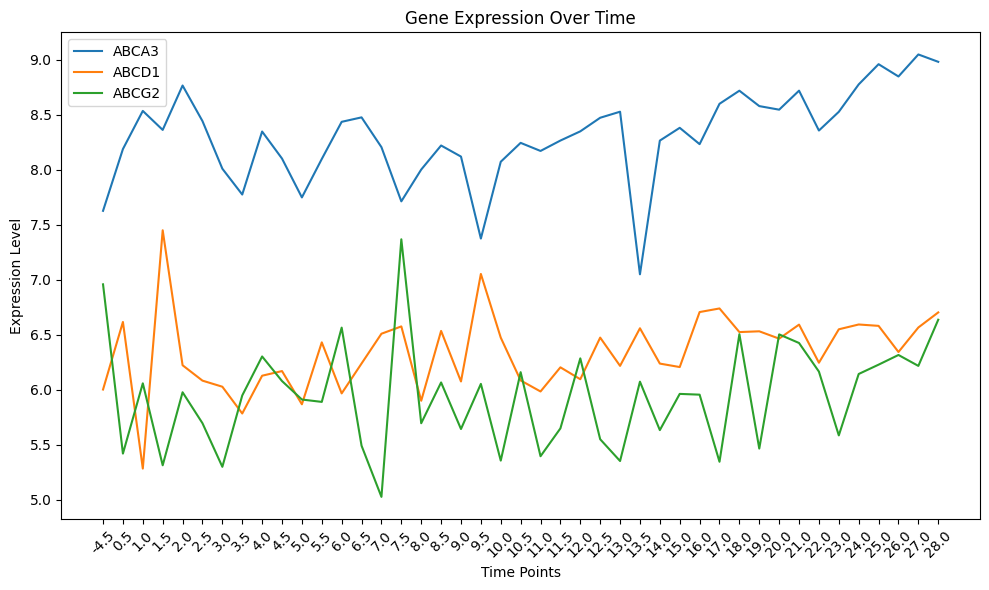

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("processed_mRNA_with_chromosomes.csv")

genes_to_plot = ['ABCA3', 'ABCD1', 'ABCG2'] 

time_points_columns = [col for col in df.columns if col not in ['Gene', 'Chromosome', 'Start', 'End']]

plt.figure(figsize=(10, 6))

for gene in genes_to_plot:
    gene_data = df[df['Gene'] == gene]
    expression_values = gene_data[time_points_columns].values.flatten()
    
    plt.plot(time_points_columns, expression_values, label=gene)

plt.title('Gene Expression Over Time')
plt.xlabel('Time Points')
plt.ylabel('Expression Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

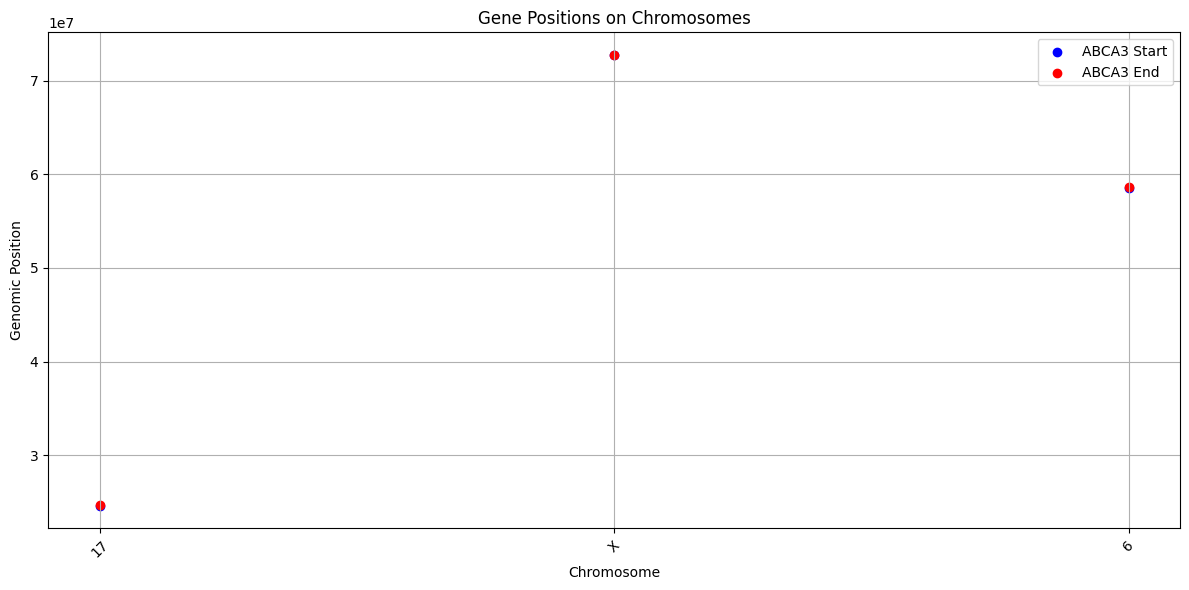

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("processed_mRNA_with_chromosomes.csv")
genes_to_plot = ['ABCA3', 'ABCD1', 'ABCG2', 'Actb']  

plt.figure(figsize=(12, 6))

for gene in genes_to_plot:
    gene_data = df[df['Gene'] == gene]
    df['Chromosome'] = df['Chromosome'].astype(str)

    plt.scatter(gene_data['Chromosome'], gene_data['Start'], color='blue', label=f'{gene} Start' if gene == genes_to_plot[0] else "")
    plt.scatter(gene_data['Chromosome'], gene_data['End'], color='red', label=f'{gene} End' if gene == genes_to_plot[0] else "")

plt.title('Gene Positions on Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Genomic Position')

plt.xticks(rotation=45)

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.show()



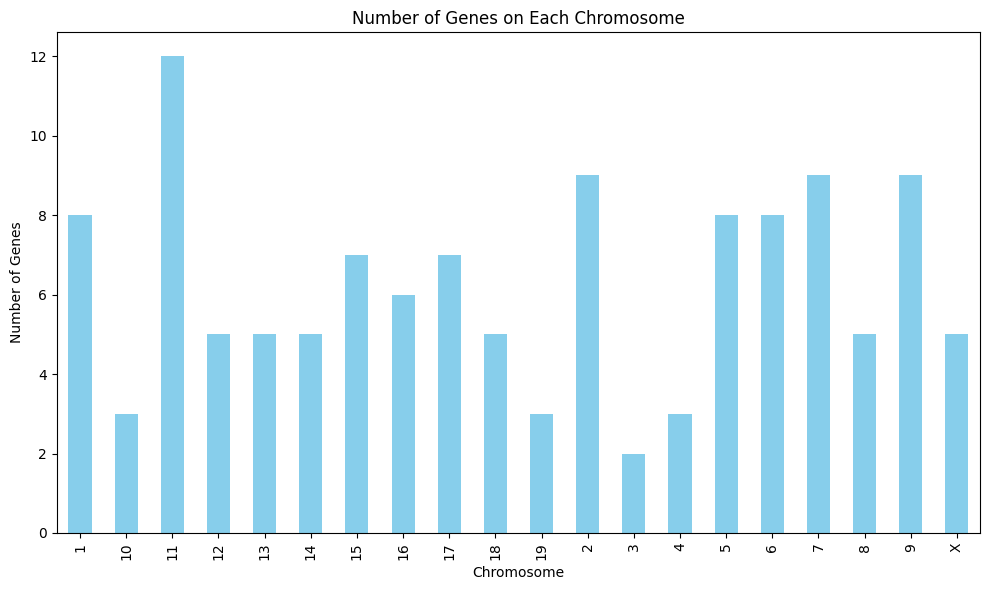

In [7]:
gene_counts = df['Chromosome'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
gene_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Genes on Each Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Number of Genes')
plt.tight_layout()
plt.show()


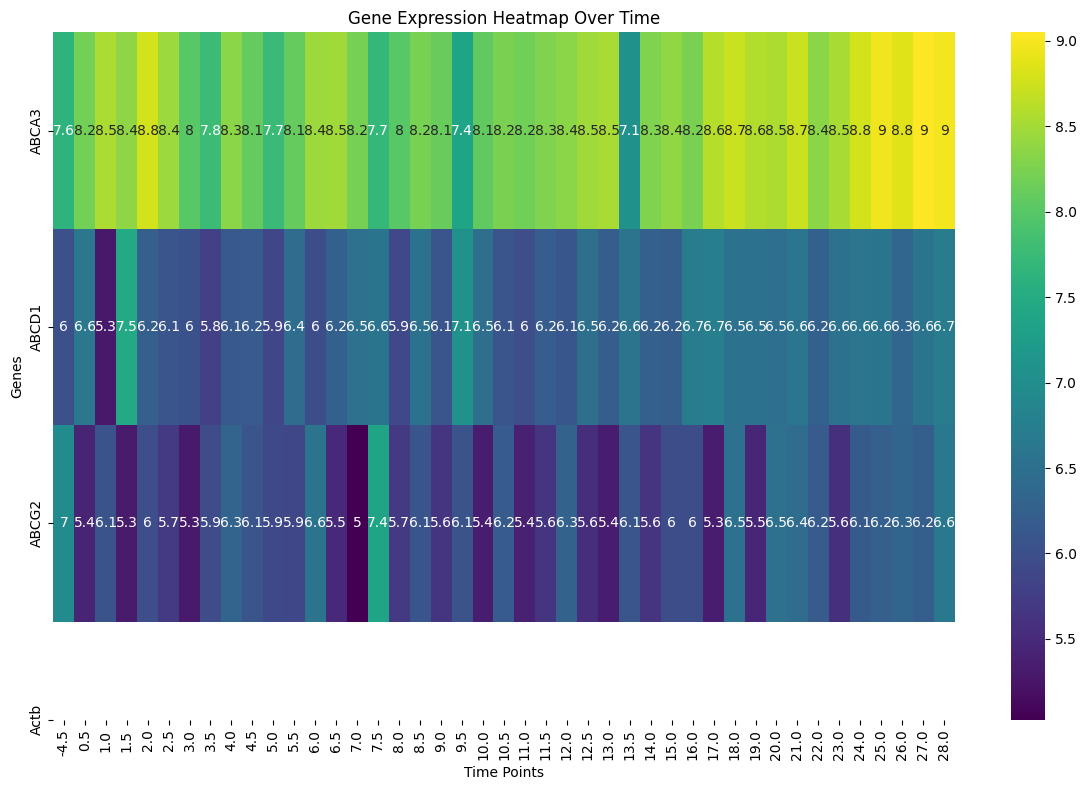

In [14]:
import seaborn as sns

genes_of_interest = ['ABCA3', 'ABCD1', 'ABCG2', 'Actb']  

expression_values = df[df['Gene'].isin(genes_of_interest)][time_points_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(expression_values, annot=True, cmap='viridis', xticklabels=time_points_columns, yticklabels=genes_of_interest)
plt.title("Gene Expression Heatmap Over Time")
plt.xlabel("Time Points")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()


In [16]:
fold_changes = {}

for gene in genes_to_plot:
    gene_data = df[df['Gene'] == gene]

    expression_1 = gene_data['-4.5'].values[0]
    expression_2 = gene_data['1.0'].values[0]

    fold_change = expression_2 / expression_1  
    fold_changes[gene] = fold_change

for gene, fold_change in fold_changes.items():
    print(f"Gene {gene}: Fold Change = {fold_change:.2f}")

"""
Based on output values, Gene ABCA3 is upregulated (increased expression) at the later time point (fold > 1)
ABCD1 and ABCG2 suggests downregulation (decreased expression). (fold < 1)
"""


Gene ABCA3: Fold Change = 1.12
Gene ABCD1: Fold Change = 0.88
Gene ABCG2: Fold Change = 0.87


In [4]:
import pandas as pd 

data = pd.read_csv('mapped/enhanced_interactions_new_new.csv')
data.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0,Gene1_Compartment,Gene2_Compartment,Gene1_Insulation_Score,Gene2_Insulation_Score,Gene1_TAD_Boundary_Distance,Gene2_TAD_Boundary_Distance
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,9.049,12.38100,8.982,12.38100,B,B,-0.499831,-1.323450,3.0,0.0
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,9.049,6.89825,8.982,6.74025,B,B,-0.499831,-1.493575,3.0,2.0
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,9.049,3.99075,8.982,4.81275,B,B,-0.499831,-1.323450,3.0,0.0
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,9.049,6.23225,8.982,6.08250,B,A,-0.499831,0.139504,3.0,1.0
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,9.049,10.22725,8.982,10.11025,B,B,-0.499831,0.000000,3.0,7.0


In [2]:
data.shape

(190, 103)

In [2]:
data.columns

Index(['Gene1', 'Gene1_Chromosome', 'Gene1_Start', 'Gene1_End', 'Gene1_Bin',
       'Gene2', 'Gene2_Chromosome', 'Gene2_Start', 'Gene2_End', 'Gene2_Bin',
       ...
       'Gene1_Time_27.0', 'Gene2_Time_27.0', 'Gene1_Time_28.0',
       'Gene2_Time_28.0', 'Gene1_Compartment', 'Gene2_Compartment',
       'Gene1_Insulation_Score', 'Gene2_Insulation_Score',
       'Gene1_TAD_Boundary_Distance', 'Gene2_TAD_Boundary_Distance'],
      dtype='object', length=103)

In [22]:
import pandas as pd
data_new_mapped = pd.read_csv('mapped/complete_genome_mapping_new.csv')
data_new_mapped.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_24.0,Gene2_Time_24.0,Gene1_Time_25.0,Gene2_Time_25.0,Gene1_Time_26.0,Gene2_Time_26.0,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,8.77675,12.38100,8.9605,12.38100,8.84875,12.38100,9.049,12.38100,8.982,12.38100
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,8.77675,7.00325,8.9605,6.84650,8.84875,6.70850,9.049,6.89825,8.982,6.74025
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,8.77675,4.46950,8.9605,4.15050,8.84875,4.38775,9.049,3.99075,8.982,4.81275
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,8.77675,6.00250,8.9605,6.21775,8.84875,6.46625,9.049,6.23225,8.982,6.08250
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,8.77675,10.05775,8.9605,10.30400,8.84875,10.23475,9.049,10.22725,8.982,10.11025


In [23]:
data_new_mapped.shape

(69, 97)

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("mapped/enhanced_interactions_new_new.csv")

shuffled_df = df.copy()
for chrom in df['Gene1_Chromosome'].unique():
    subset = df[df['Gene1_Chromosome'] == chrom]
    shuffled_df.loc[subset.index, 'Gene2'] = np.random.permutation(subset['Gene2'].values)

shuffled_df.to_csv("mapped/synthetic_data.csv", index=False)

In [8]:
data_synethetic = pd.read_csv("mapped/synthetic_data.csv")

In [9]:
data_synethetic.shape

(69, 103)

In [15]:
def clean_gene_name(gene_name):
    if pd.isna(gene_name):
        return gene_name
    return gene_name.split('(')[0].strip()

In [44]:
def prepare_and_generate_synthetic_data(csv_file, problematic_genes, num_synthetic_per_gene=3, noise_std=0.1):
    df = pd.read_csv(csv_file)
    original_columns = df.columns.tolist()
    
    print(f"Original dataset shape: {df.shape}")
    
    df['Gene1'] = df['Gene1'].apply(clean_gene_name)
    df['Gene2'] = df['Gene2'].apply(clean_gene_name)
    
    synthetic_rows = []
    
    for prob_gene in problematic_genes:
        existing_connections = set(df[df['Gene1'] == prob_gene]['Gene2'].tolist() +
                                 df[df['Gene2'] == prob_gene]['Gene1'].tolist())
        
        gene_stats = df[(df['Gene1'] == prob_gene) | (df['Gene2'] == prob_gene)]
        
        if len(gene_stats) > 0:
            base_stats = gene_stats.iloc[0].to_dict()
        else:
            print(f"Warning: No existing data found for {prob_gene}, using dataset statistics")
            base_stats = df.mean().to_dict()
            base_stats.update(df.mode().iloc[0].to_dict())
        
        all_genes = pd.concat([df['Gene1'], df['Gene2']]).unique()
        potential_partners = [g for g in all_genes if g not in existing_connections and g != prob_gene]
        
        if len(potential_partners) < num_synthetic_per_gene:
            print(f"Warning: Not enough potential partners for {prob_gene}")
            continue
        
        selected_partners = np.random.choice(potential_partners, num_synthetic_per_gene, replace=False)
        
        for partner in selected_partners:
            synthetic_row = base_stats.copy()
            
            synthetic_row['Gene1'] = prob_gene
            synthetic_row['Gene2'] = partner

            for col in df.columns:
                if col in ['Gene1', 'Gene2', 'Gene1_Compartment', 'Gene2_Compartment']:
                    continue
                    
                if pd.api.types.is_numeric_dtype(df[col].dtype):
                    base_value = synthetic_row[col]
                    if pd.notnull(base_value):
                        if 'Time_' in col:
                            scale = abs(base_value * noise_std * 0.5) if base_value != 0 else noise_std * 0.5
                        else:
                            scale = abs(base_value * noise_std) if base_value != 0 else noise_std
                            
                        noise = np.random.normal(0, scale)
                        synthetic_row[col] = max(0, base_value + noise)
            
            synthetic_rows.append(synthetic_row)
    
    synthetic_df = pd.DataFrame(synthetic_rows, columns=original_columns)
    
    combined_df = pd.concat([df, synthetic_df], ignore_index=True)
    
    print("\nSynthetic Data Generation Statistics:")
    for gene in problematic_genes:
        orig_connections = len(df[(df['Gene1'] == gene) | (df['Gene2'] == gene)])
        new_connections = len(combined_df[(combined_df['Gene1'] == gene) | 
                                        (combined_df['Gene2'] == gene)])
        print(f"{gene}: {orig_connections} -> {new_connections} connections")
    
    print(f"\nFinal dataset shape: {combined_df.shape}")

    if set(combined_df.columns) != set(original_columns):
        print("Warning: Column mismatch detected!")
        print("New columns:", set(combined_df.columns) - set(original_columns))
        print("Missing columns:", set(original_columns) - set(combined_df.columns))
    
    print("\nValue Range Verification:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols[:5]:
        orig_range = (df[col].min(), df[col].max())
        new_range = (combined_df[col].min(), combined_df[col].max())
        print(f"{col}: Original range {orig_range} -> New range {new_range}")
    
    return combined_df[original_columns]

In [35]:
def prepare_and_generate_synthetic_data(csv_file, problematic_genes, num_synthetic_per_gene=3, noise_std=0.1):
    gene_specific_noise = {
        'AMACR': 0.05,  # Lower noise due to less stable predictions
        'MMP7': 0.05,   # Higher noise to handle extreme HiC variations
        'ABCG2': 0.05   # Moderate noise for more stable gene
    }
    
    df = pd.read_csv(csv_file)
    original_columns = df.columns.tolist()
    
    print(f"Original dataset shape: {df.shape}")
    
    df['Gene1'] = df['Gene1'].apply(clean_gene_name)
    df['Gene2'] = df['Gene2'].apply(clean_gene_name)
    
    synthetic_rows = []
    
    for prob_gene in problematic_genes:
        current_noise_std = gene_specific_noise.get(prob_gene, noise_std)
        print(f"\nProcessing {prob_gene} with noise level: {current_noise_std}")
        
        existing_connections = set(df[df['Gene1'] == prob_gene]['Gene2'].tolist() +
                                 df[df['Gene2'] == prob_gene]['Gene1'].tolist())
        
        gene_stats = df[(df['Gene1'] == prob_gene) | (df['Gene2'] == prob_gene)]
        
        if len(gene_stats) > 0:
            base_stats = gene_stats.iloc[0].to_dict()
        else:
            print(f"Warning: No existing data found for {prob_gene}, using dataset statistics")
            base_stats = df.mean().to_dict()
            base_stats.update(df.mode().iloc[0].to_dict())
        
        all_genes = pd.concat([df['Gene1'], df['Gene2']]).unique()
        potential_partners = [g for g in all_genes if g not in existing_connections and g != prob_gene]
        
        if len(potential_partners) < num_synthetic_per_gene:
            print(f"Warning: Not enough potential partners for {prob_gene}")
            continue
        
        selected_partners = np.random.choice(potential_partners, num_synthetic_per_gene, replace=False)
        
        for partner in selected_partners:
            synthetic_row = base_stats.copy()
            synthetic_row['Gene1'] = prob_gene
            synthetic_row['Gene2'] = partner

            for col in df.columns:
                if col in ['Gene1', 'Gene2', 'Gene1_Compartment', 'Gene2_Compartment']:
                    continue
                    
                if pd.api.types.is_numeric_dtype(df[col].dtype):
                    base_value = synthetic_row[col]
                    if pd.notnull(base_value):
                        if 'Time_' in col:
                            scale = abs(base_value * current_noise_std * 0.5) if base_value != 0 else current_noise_std * 0.5
                        else:
                            scale = abs(base_value * current_noise_std) if base_value != 0 else current_noise_std
                            
                        noise = np.random.normal(0, scale)
                        synthetic_row[col] = max(0, base_value + noise)
            
            synthetic_rows.append(synthetic_row)
    
    synthetic_df = pd.DataFrame(synthetic_rows, columns=original_columns)
    
    combined_df = pd.concat([df, synthetic_df], ignore_index=True)
    
    print("\nSynthetic Data Generation Statistics:")
    for gene in problematic_genes:
        orig_connections = len(df[(df['Gene1'] == gene) | (df['Gene2'] == gene)])
        new_connections = len(combined_df[(combined_df['Gene1'] == gene) | 
                                        (combined_df['Gene2'] == gene)])
        print(f"{gene}: {orig_connections} -> {new_connections} connections")
    
    print(f"\nFinal dataset shape: {combined_df.shape}")
    
    print("\nValue Ranges for Problematic Genes:")
    for gene in ['AMACR', 'MMP7', 'ABCG2']:
        print(f"\n{gene}:")
        for col in df.select_dtypes(include=[np.number]).columns[:5]:  # First 5 numeric columns
            orig_range = df[df['Gene1'] == gene][col].agg(['min', 'max'])
            new_range = combined_df[combined_df['Gene1'] == gene][col].agg(['min', 'max'])
            print(f"{col}:")
            print(f"  Original: {orig_range['min']:.4f} to {orig_range['max']:.4f}")
            print(f"  New: {new_range['min']:.4f} to {new_range['max']:.4f}")
    
    return combined_df[original_columns]

In [52]:
import pandas as pd
import numpy as np

problematic_genes = ['THTPA', 'AMACR', 'MMP7', 'ABCG2', 'HPGDS', 'VIM']

enhanced_df = prepare_and_generate_synthetic_data(
    csv_file='mapped/enhanced_interactions_new_new.csv',
    problematic_genes=problematic_genes,
    num_synthetic_per_gene=3,
    noise_std=0.1
)

enhanced_df.to_csv('mapped/enhanced_interactions_synthetic.csv', index=False)

Original dataset shape: (69, 103)

Synthetic Data Generation Statistics:
THTPA: 3 -> 6 connections
AMACR: 1 -> 4 connections
MMP7: 4 -> 8 connections
ABCG2: 2 -> 5 connections
HPGDS: 2 -> 6 connections
VIM: 4 -> 7 connections

Final dataset shape: (87, 103)

Value Range Verification:
Gene1_Start: Original range (3532778.0, 72760203.0) -> New range (3414697.112781581, 72760203.0)
Gene1_End: Original range (3894736.0, 72782140.0) -> New range (3156200.96514268, 72782140.0)
Gene1_Bin: Original range (3000000.0, 72000000.0) -> New range (2141249.9091811436, 72000000.0)
Gene2_Start: Original range (6365443.0, 69254684.0) -> New range (6365443.0, 69254684.0)
Gene2_End: Original range (6369817.0, 69416409.0) -> New range (6208534.873548519, 73587958.7419538)


In [46]:
data_synethetic = pd.read_csv('mapped/enhanced_interactions_synthetic.csv')

In [47]:
data.head()

,Gene1,Gene1_Chromosome,Gene1_Start,Gene1_End,Gene1_Bin,Gene2,Gene2_Chromosome,Gene2_Start,Gene2_End,Gene2_Bin,...,Gene1_Time_27.0,Gene2_Time_27.0,Gene1_Time_28.0,Gene2_Time_28.0,Gene1_Compartment,Gene2_Compartment,Gene1_Insulation_Score,Gene2_Insulation_Score,Gene1_TAD_Boundary_Distance,Gene2_TAD_Boundary_Distance
0,ABCA3,17,24570924.0,24629175.0,24000000.0,AGER,17,34816836.0,34819910.0,34000000.0,...,9.049,12.38100,8.982,12.38100,B,B,-0.499831,-1.323450,3.0,0.0
1,ABCA3,17,24570924.0,24629175.0,24000000.0,NME3,17,25115474.0,25116496.0,25000000.0,...,9.049,6.89825,8.982,6.74025,B,B,-0.499831,-1.493575,3.0,2.0
2,ABCA3,17,24570924.0,24629175.0,24000000.0,RAGE,17,34816836.0,34819910.0,34000000.0,...,9.049,3.99075,8.982,4.81275,B,B,-0.499831,-1.323450,3.0,0.0
3,ABCA3,17,24570924.0,24629175.0,24000000.0,tbp,17,15720150.0,15748641.0,15000000.0,...,9.049,6.23225,8.982,6.08250,B,A,-0.499831,0.139504,3.0,1.0
4,ABCA3,17,24570924.0,24629175.0,24000000.0,Vegf,17,46327919.0,46343295.0,46000000.0,...,9.049,10.22725,8.982,10.11025,B,B,-0.499831,0.000000,3.0,7.0


In [48]:
data.columns

Index(['Gene1', 'Gene1_Chromosome', 'Gene1_Start', 'Gene1_End', 'Gene1_Bin',
       'Gene2', 'Gene2_Chromosome', 'Gene2_Start', 'Gene2_End', 'Gene2_Bin',
       ...
       'Gene1_Time_27.0', 'Gene2_Time_27.0', 'Gene1_Time_28.0',
       'Gene2_Time_28.0', 'Gene1_Compartment', 'Gene2_Compartment',
       'Gene1_Insulation_Score', 'Gene2_Insulation_Score',
       'Gene1_TAD_Boundary_Distance', 'Gene2_TAD_Boundary_Distance'],
      dtype='object', length=103)

In [49]:
data_synethetic.shape

(87, 103)

In [24]:
data_real = pd.read_csv('mapped/enhanced_interactions_new_new.csv')

In [25]:
data_real.shape

(69, 103)